<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/SimpleLinearRegression_StochasticGradientDescentOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

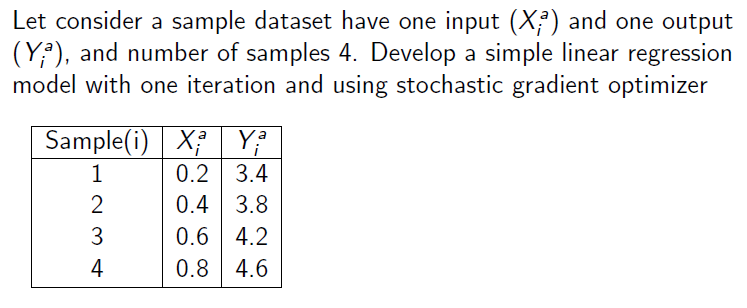

In [3]:
import numpy as np
import math as mt
import random
data=np.array([[0.2,3.4],[0.4,3.8],[0.6,4.2],[0.8,4.6]])
m=random.uniform(-1,1)
c=random.uniform(-1,1)
eta=0.9
max_iter=10000

In [ ]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

In [ ]:
for iter in range(max_iter):
  for sample in range(len(data[:,0])):
    del_m,del_c=gradient(m,c,data[sample,0],data[sample,1])
    m=m-eta*del_m
    c=c-eta*del_c

print('model parameter m and c',m,c)

model parameter m and c 1.9999999999999964 3.0000000000000018


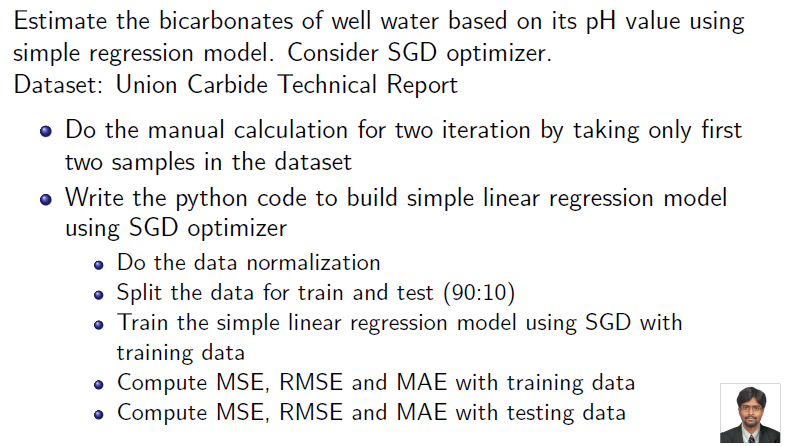

[Grond Water Dataset: pH & Bicorbonates](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html)


X = pH of well water
Y = Bicarbonate (parts per million) of well water
The data is by water well from a random sample of wells in Northwest Texas.

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI Data/bicorbonates.csv')
df.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [7]:
normalized_df = (df-df.min())/(df.max()-df.min())
normalized_df.head()


,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_df.X, normalized_df.Y, test_size = 0.10, random_state = 10)

In [9]:
import numpy as np
import math as mt
import random
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000

In [10]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

In [11]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c

print('model parameter m and c',m,c)

model parameter m and c -0.24265760666929834 0.7891381221272102


In [12]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [13]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [14]:
y_pred_test = []
for i in x_test:
  y_p_te = (m * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

In [15]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train))
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 0.30385884356173964
Mean square error 0.09233019681067778
Mean absolute error 0.24773400066102744


In [16]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean square error', mse)
mse = (mean_squared_error(y_test, y_pred_test))
print('Mean square error', mse)
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 0.32325027367815695
Mean square error 0.10449073943300337
Mean absolute error 0.22891315522620292


In [17]:
pH_min=df.min()[0]
pH_max=df.max()[0]
bc_min=df.min()[1]
bc_max=df.max()[1]
print(pH_min,pH_max,bc_min,bc_max)

pH=input('enter pH value of ground water')
pH_norm=(float(pH)-pH_min)/(pH_max-pH_min)
print(pH_norm)
bicorbonates_norm=m*pH_norm+c
print(bicorbonates_norm)
bicorbonates=bicorbonates_norm*(bc_max-bc_min)+bc_min

print('Estimated bicarbonates=',bicorbonates)

6.7 8.8 35.0 262.0
enter pH value of ground water1.2
-2.619047619047618
1.4246699491182295
Estimated bicarbonates= 358.4000784498381


# Short-Term Load Prediction

In [38]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI Data/loaddata_simple_regression.csv')
df.head()

,T-24,T
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040


In [39]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code


In [40]:
sample_outliers = detect_outliers_zscore(df['T-24'])
print("Outliers from Z-scores method: ", sample_outliers)
sample_outliers = detect_outliers_zscore(df['T'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  []
Outliers from Z-scores method:  []


In [41]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
df_f=data[(z<3).all(axis=1)]
df_f

,T-24,T
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040
...,...,...
2155,4643.97696,4626.51840
2156,5813.70048,4567.90752
2157,7115.92200,4723.63164
2158,6189.99480,5150.27520


In [42]:
print(df.isnull().sum())

T-24    0
T       0
dtype: int64


In [43]:
m1=df['T-24'].mean()
m7=df['T'].mean()
df['T-24'].fillna(value=m1, inplace=True)
df['T'].fillna(value=m7, inplace=True)
df

,T-24,T
0,5551.82208,4931.26380
1,4983.17184,4775.53968
2,4888.39680,4713.81120
3,5072.95872,4689.02628
4,5196.25980,4844.75040
...,...,...
2155,4643.97696,4626.51840
2156,5813.70048,4567.90752
2157,7115.92200,4723.63164
2158,6189.99480,5150.27520


In [45]:
print(df.isnull().sum())

T-24    0
T       0
dtype: int64


In [46]:
normalized_df = (df-df.min())/(df.max()-df.min())
normalized_df.head()

,T-24,T
0,0.397877,0.284300
1,0.293800,0.255799
2,0.276454,0.244501
3,0.310234,0.239965
4,0.332801,0.268466


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalized_df['T-24'], normalized_df['T'], test_size = 0.10, random_state = 10)

In [60]:
import numpy as np
import math as mt
import random
m=random.uniform(-100,100)
c=random.uniform(-100,100)
eta=0.9
max_iter=100

In [61]:
def gradient(m,c,x,y):
  m_deriv=-1*(y-m*x-c)*x
  c_deriv=-1*(y-m*x-c)
  return m_deriv,c_deriv

In [62]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m,del_c=gradient(m, c, x_train.iloc[sample], y_train.iloc[sample])
    m=m-eta*del_m
    c=c-eta*del_c

print('model parameter m and c',m,c)

model parameter m and c 0.7937193541323421 -0.05884163060904245


In [63]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [64]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [65]:
y_pred_test = []
for i in x_test:
  y_p_te = (m * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

In [66]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean square error', rmse)
mse = (mean_squared_error(y_train, y_pred_train))
print('Mean square error', mse)
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 0.20463470457457666
Mean square error 0.041875362316324265
Mean absolute error 0.17259202475017418


In [67]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean square error', mse)
mse = (mean_squared_error(y_test, y_pred_test))
print('Mean square error', mse)
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 0.21092954176282325
Mean square error 0.0444912715882746
Mean absolute error 0.17631395090444613


In [70]:
Day_min=df.min()[0]
Day_max=df.max()[0]
T_min=df.min()[1]
T_max=df.max()[1]
print(Day_min,Day_max,T_min,T_max)

Load=input('enter load value before one day')
Load_norm=(float(Load)-Day_min)/(Day_max-Day_min)
print(Load_norm)
Load_T_norm=m*Load_norm+c
print(Load_T_norm)
Load_T=Load_T_norm*(T_max-T_min)+T_min

print('Estimated load=',Load_T,'KW')

3377.9196 8841.66948 3377.9196 8841.66948
enter load value before one day5551
0.39772691790935344
0.2568419217950166
Estimated load= 4781.2396193864915 KW
